<a href="https://colab.research.google.com/github/michele25-10/Python/blob/main/fcc_MAGIC_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"] = (df["class"] == 'g').astype(int)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


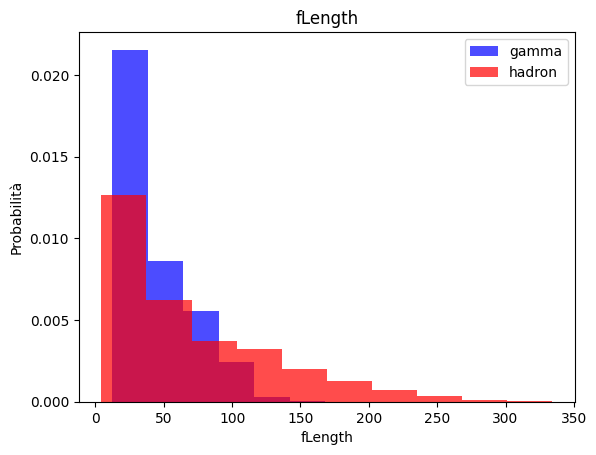

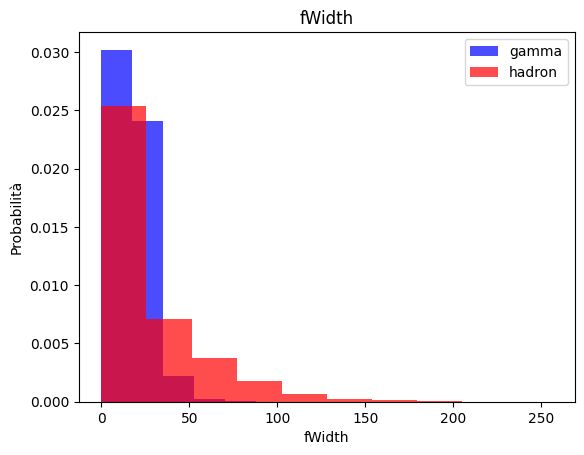

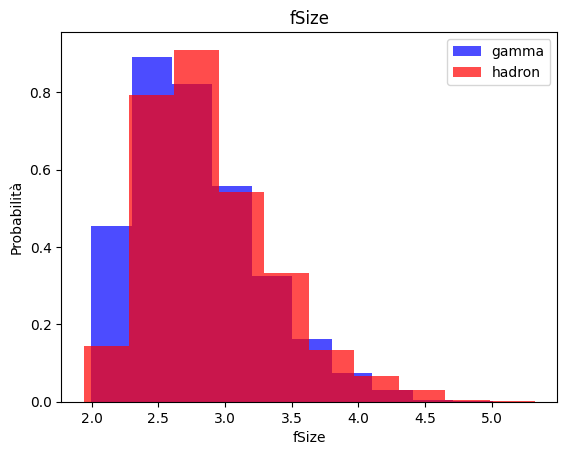

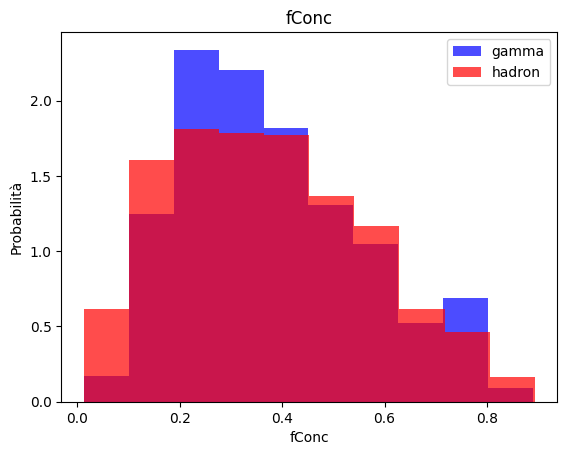

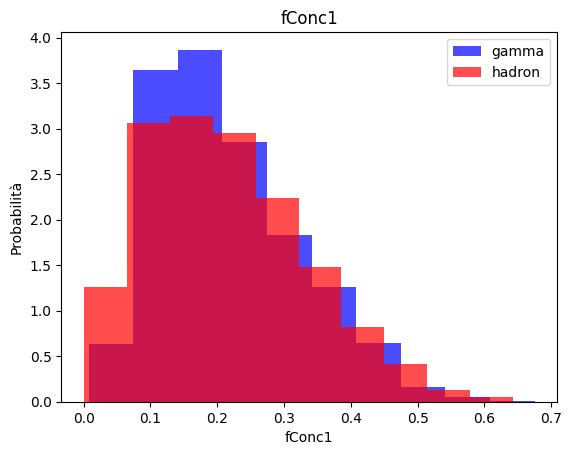

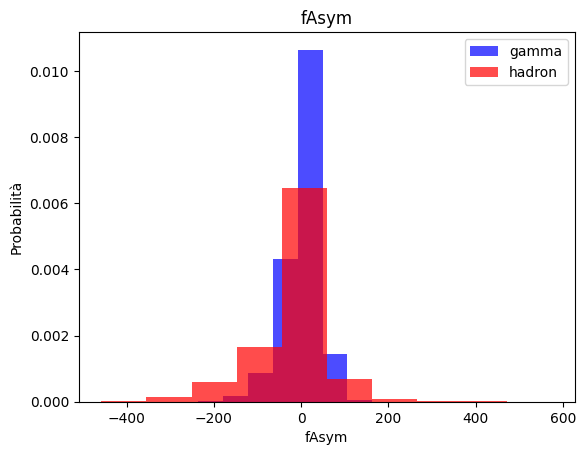

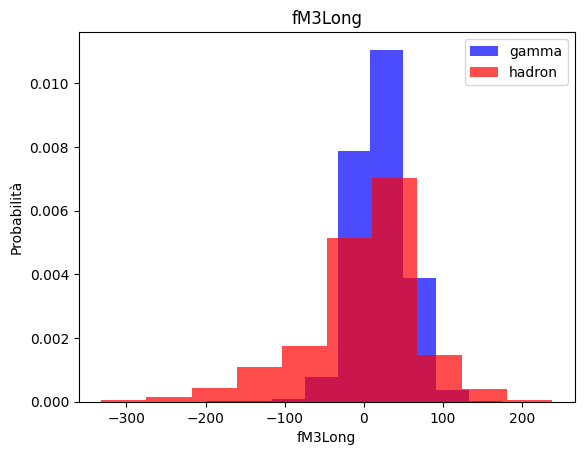

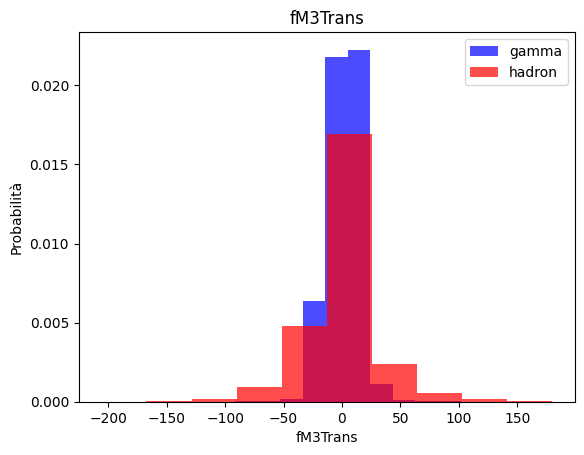

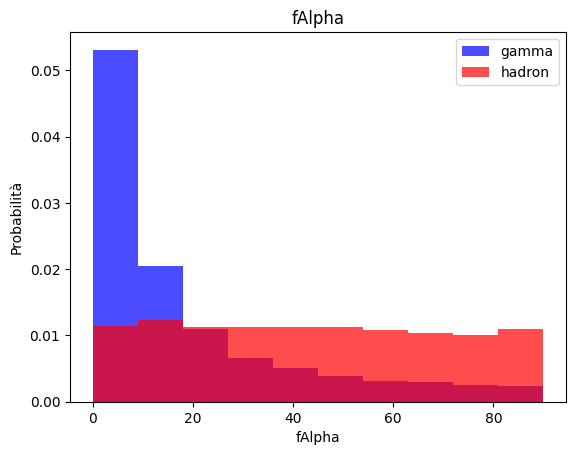

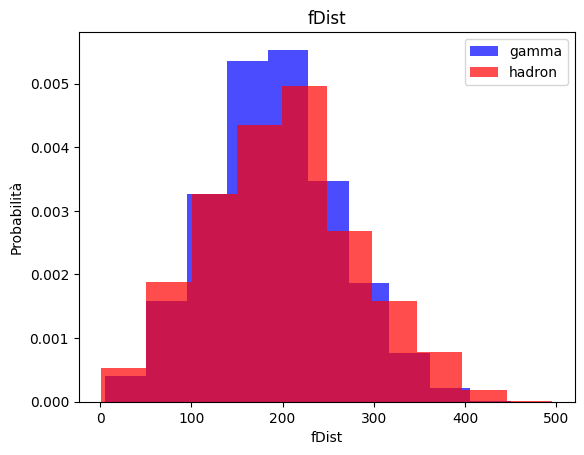

In [ ]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color="blue", label="gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color="red", label="hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probabilità")
    plt.xlabel(label)
    plt.legend()
    plt.show()

Train, validation, test datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample=False):                 #funzione
    x=dataframe[dataframe.columns[:-1]].values   #tutte le colonne :-1
    y=dataframe[dataframe.columns[-1]].values    #solo ultima colonna con -1

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:                            #prendi la classe più piccola e ricampionala per arrivare ad un 50 e 50 circa
      ros = RandomOverSampler()
      x, y = ros.fit_resample(x, y)

    data = np.hstack((x, np.reshape(y, (-1, 1))))

    return data, x, y

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

kNN --> K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1278
           1       0.86      0.85      0.86      2526

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



NAIVE BAYES --> rules of BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1278
           1       0.75      0.90      0.82      2526

    accuracy                           0.74      3804
   macro avg       0.71      0.66      0.67      3804
weighted avg       0.73      0.74      0.72      3804



log regeression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1278
           1       0.85      0.81      0.83      2526

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.79      3804



Support Vector Machine --> SVM

In [ ]:
from sklearn.svm  import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1278
           1       0.89      0.89      0.89      2526

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



Neural network

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history["loss"], label="loss")
    ax1.plot(history.history["val_loss"], label="val_loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Binary crossentropy")
    ax1.grid(True)

    ax2.plot(history.history["accuracy"], label="accuracy")
    ax2.plot(history.history["val_accuracy"], label="val_accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy")
    ax2.grid(True)

    plt.show()

In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation="relu", input_shape = (10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation="relu"),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation="sigmoid")
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss="binary_crossentropy", metrics=["accuracy"])

  history = nn_model.fit(
    x_train, y_train,
    epochs=100, batch_size=32, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.005, batch_size 32


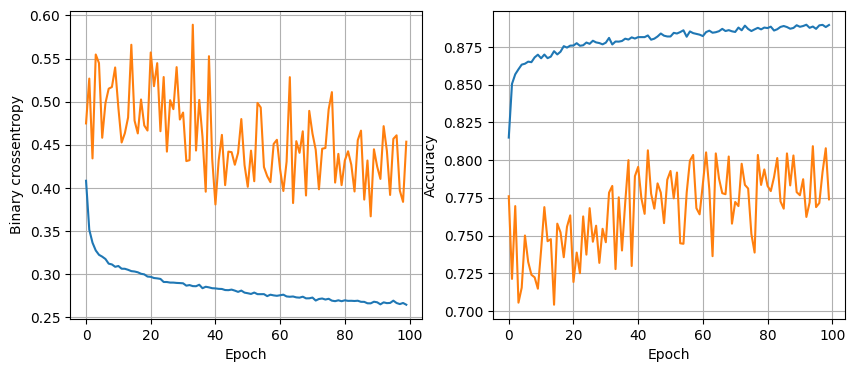

119/119 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8725
16 nodes, dropout 0, lr 0.005, batch_size 64


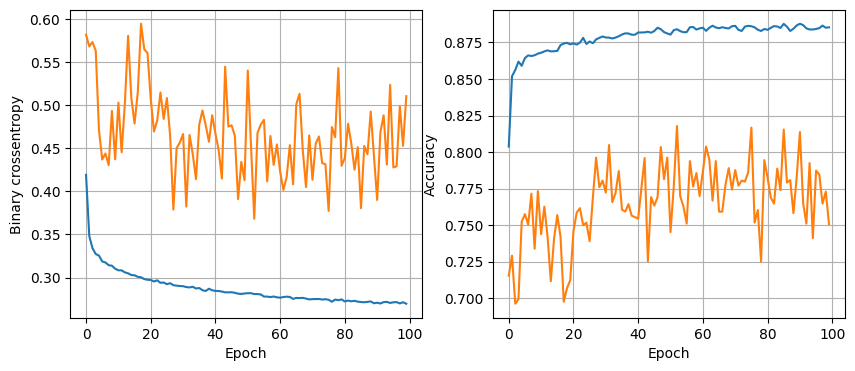

119/119 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.8699
16 nodes, dropout 0, lr 0.005, batch_size 128


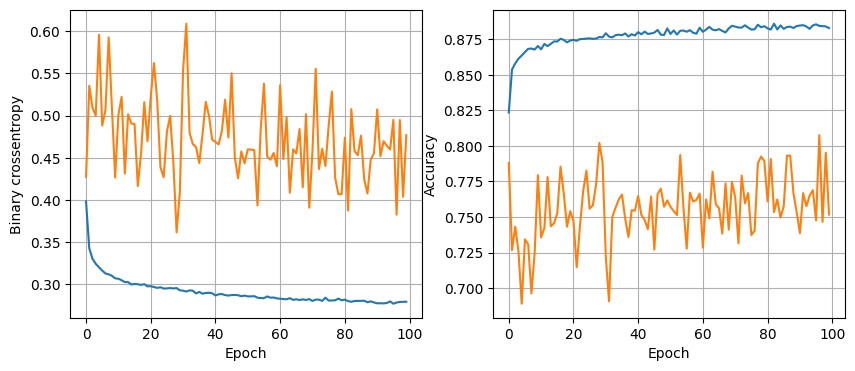

119/119 [==============================] - 0s 3ms/step - loss: 0.3205 - accuracy: 0.8672
16 nodes, dropout 0, lr 0.001, batch_size 32


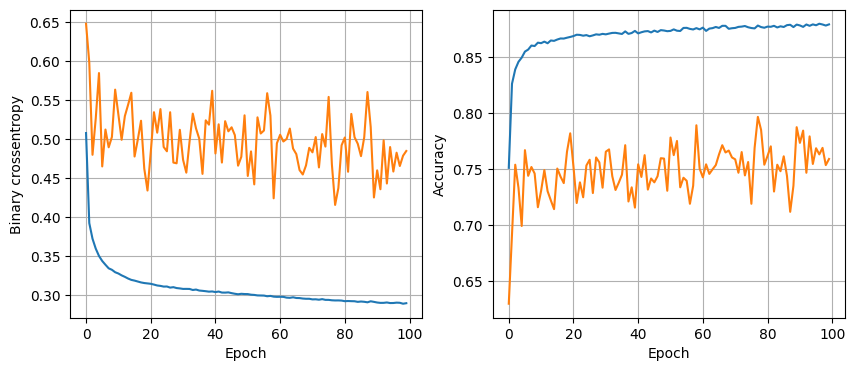

119/119 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8757
16 nodes, dropout 0, lr 0.001, batch_size 64


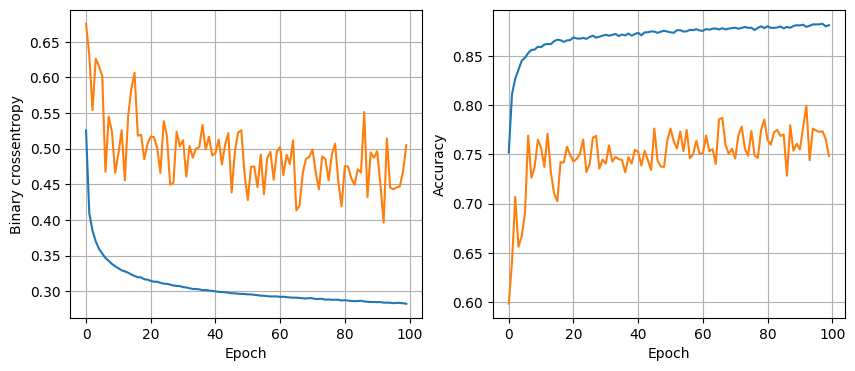

119/119 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8738
16 nodes, dropout 0, lr 0.001, batch_size 128


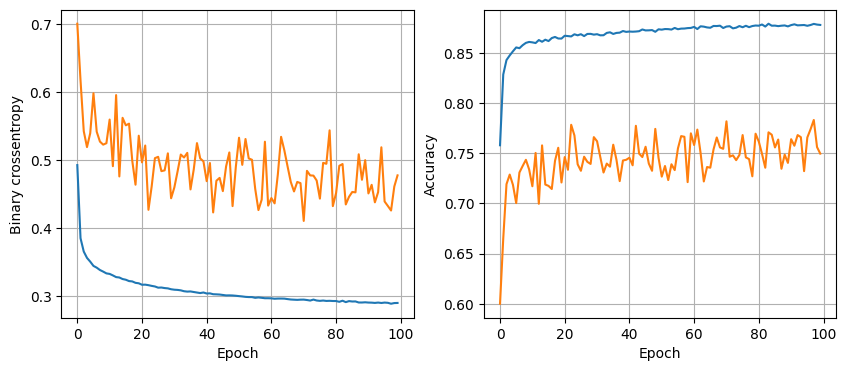

119/119 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8667
16 nodes, dropout 0.2, lr 0.005, batch_size 32


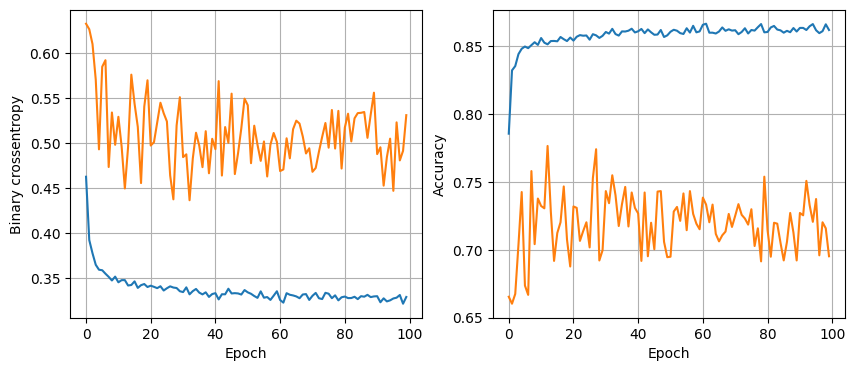

119/119 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8686
16 nodes, dropout 0.2, lr 0.005, batch_size 64


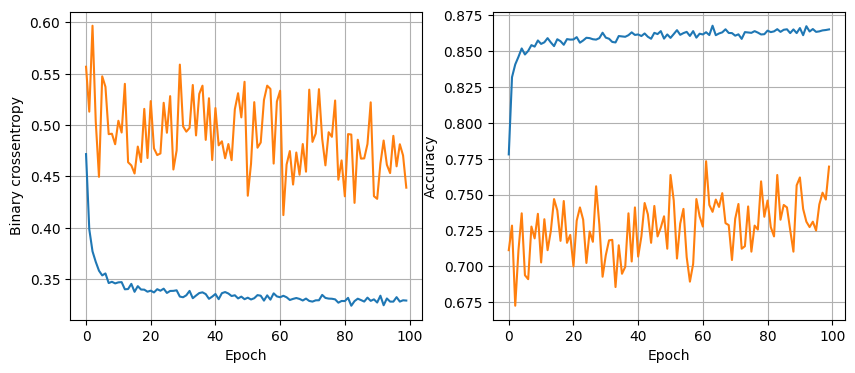

119/119 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8728
16 nodes, dropout 0.2, lr 0.005, batch_size 128


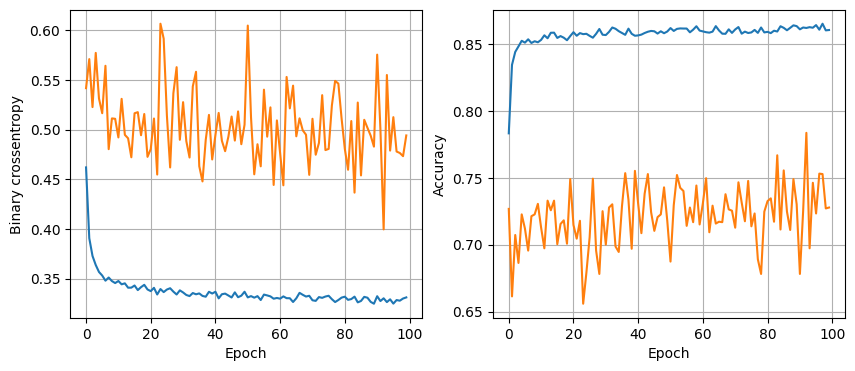

119/119 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8704
16 nodes, dropout 0.2, lr 0.001, batch_size 32


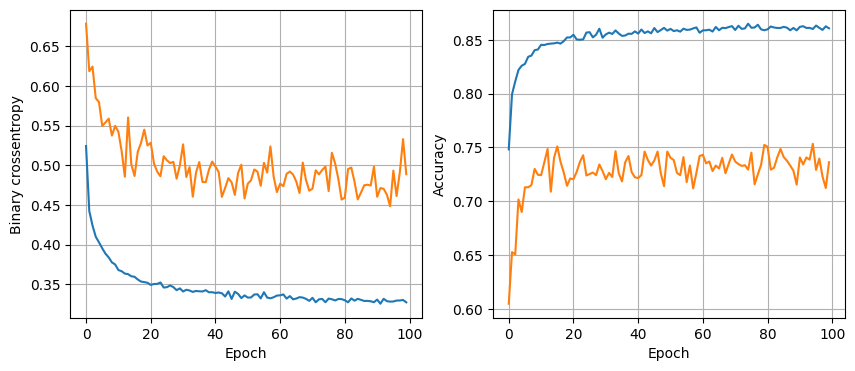

119/119 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.8683
16 nodes, dropout 0.2, lr 0.001, batch_size 64


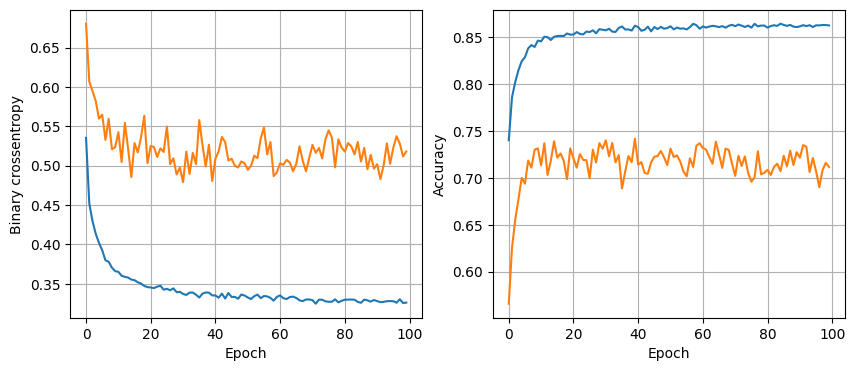

119/119 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.8691
16 nodes, dropout 0.2, lr 0.001, batch_size 128


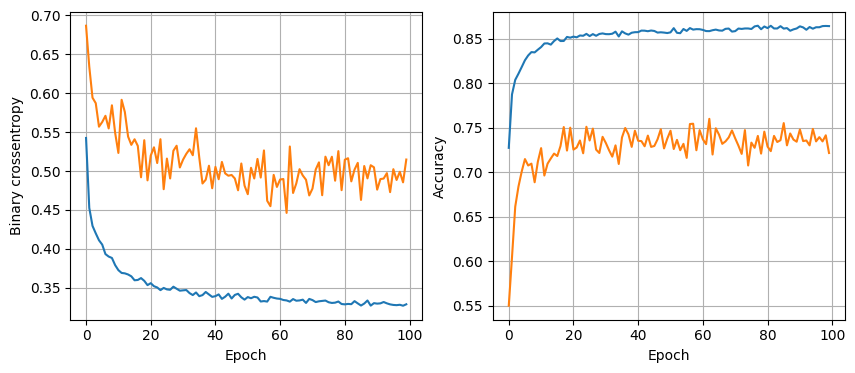

119/119 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8725
32 nodes, dropout 0, lr 0.005, batch_size 32


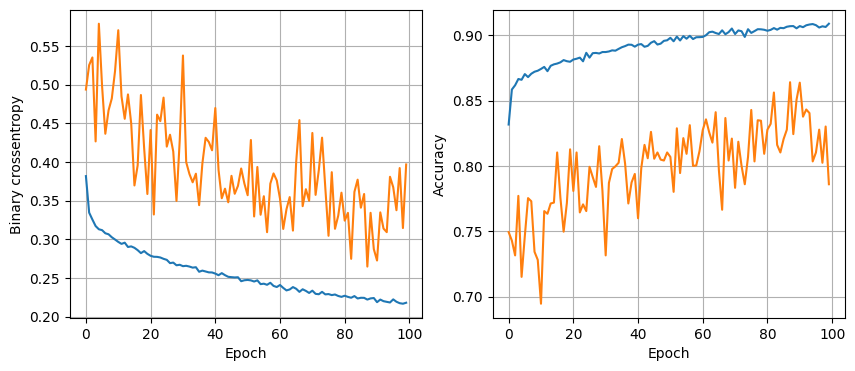

119/119 [==============================] - 0s 3ms/step - loss: 0.3801 - accuracy: 0.8728
32 nodes, dropout 0, lr 0.005, batch_size 64


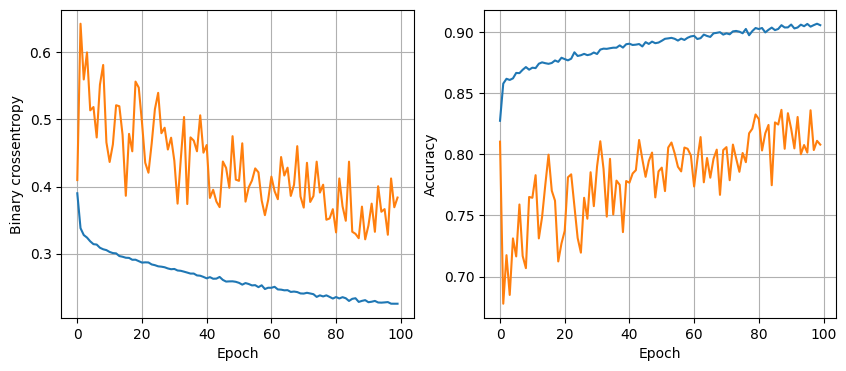

119/119 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8720
32 nodes, dropout 0, lr 0.005, batch_size 128


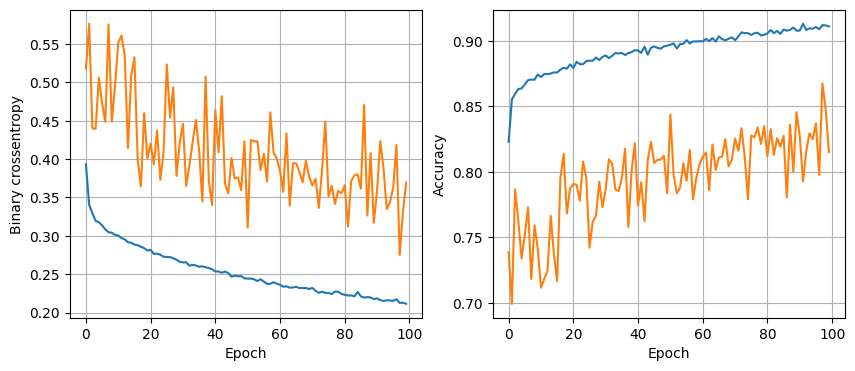

119/119 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8686
32 nodes, dropout 0, lr 0.001, batch_size 32


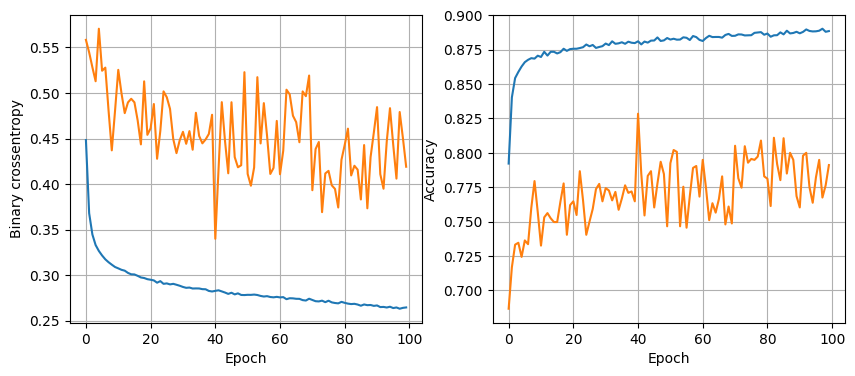

119/119 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8754
32 nodes, dropout 0, lr 0.001, batch_size 64


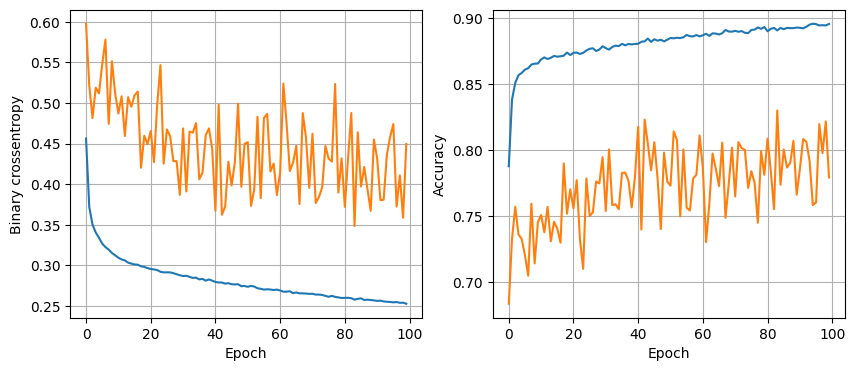

119/119 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8804
32 nodes, dropout 0, lr 0.001, batch_size 128


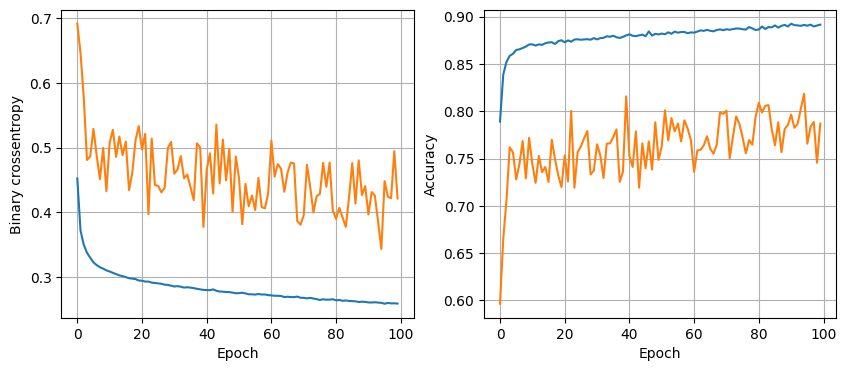

119/119 [==============================] - 0s 4ms/step - loss: 0.3246 - accuracy: 0.8754
32 nodes, dropout 0.2, lr 0.005, batch_size 32


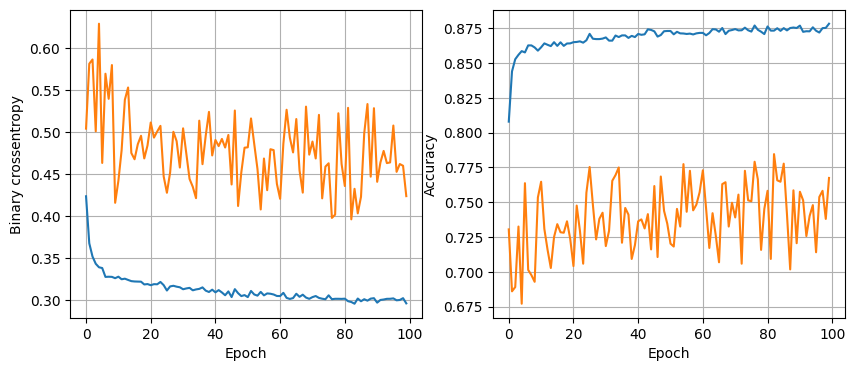

119/119 [==============================] - 0s 4ms/step - loss: 0.3048 - accuracy: 0.8772
32 nodes, dropout 0.2, lr 0.005, batch_size 64


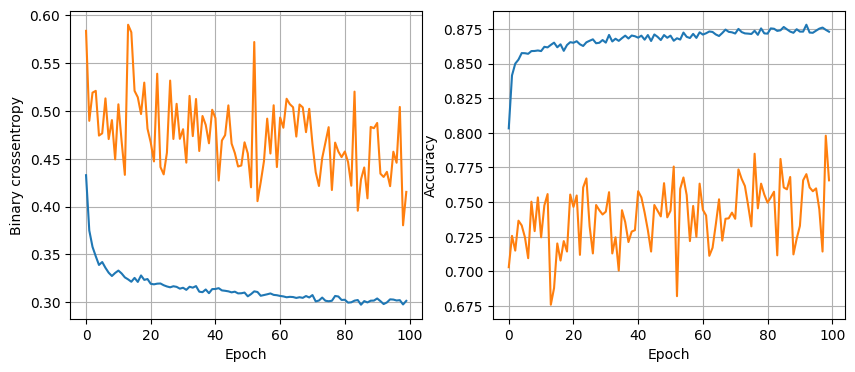

119/119 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.8775
32 nodes, dropout 0.2, lr 0.005, batch_size 128


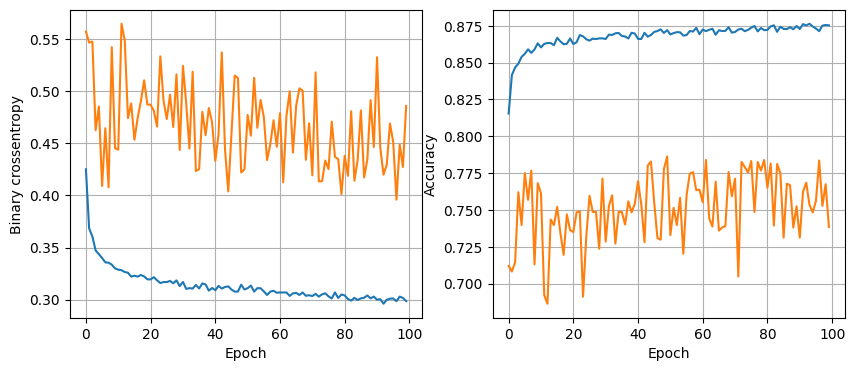

119/119 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8749
32 nodes, dropout 0.2, lr 0.001, batch_size 32


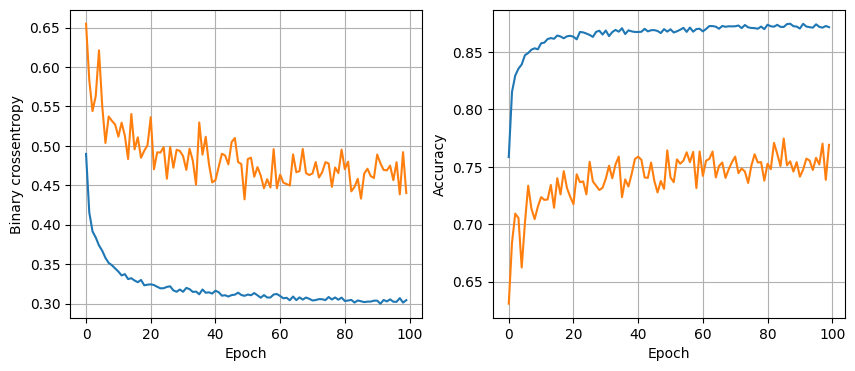

119/119 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8743
32 nodes, dropout 0.2, lr 0.001, batch_size 64


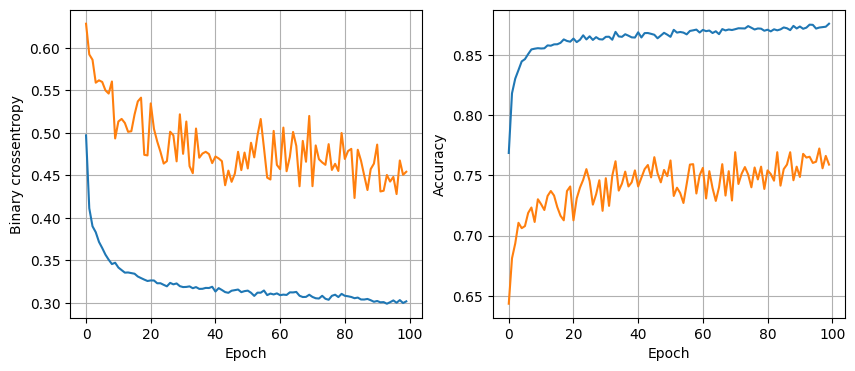

119/119 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.8764
32 nodes, dropout 0.2, lr 0.001, batch_size 128


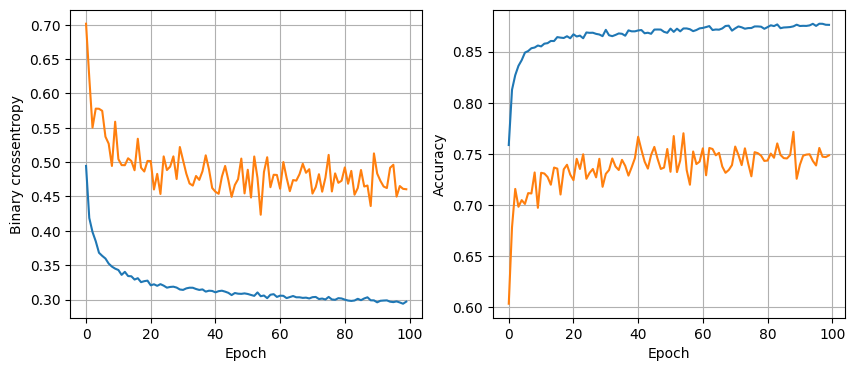

119/119 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8767
64 nodes, dropout 0, lr 0.005, batch_size 32


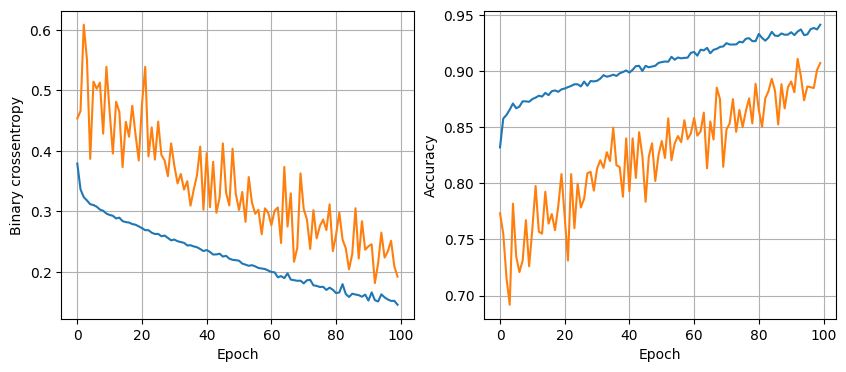

119/119 [==============================] - 0s 3ms/step - loss: 0.5982 - accuracy: 0.8657
64 nodes, dropout 0, lr 0.005, batch_size 64


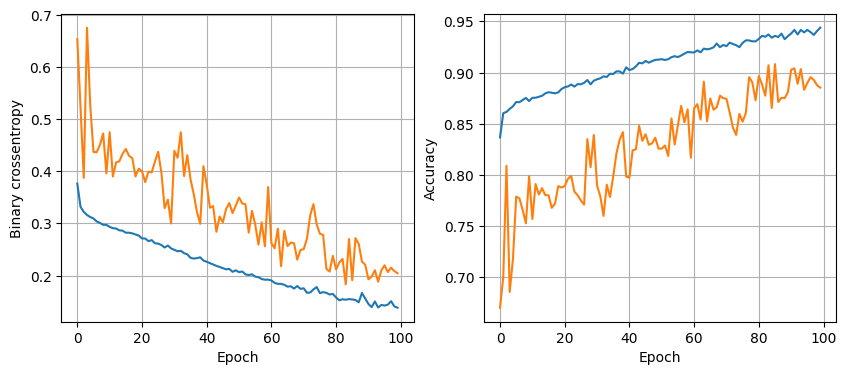

119/119 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.8533
64 nodes, dropout 0, lr 0.005, batch_size 128


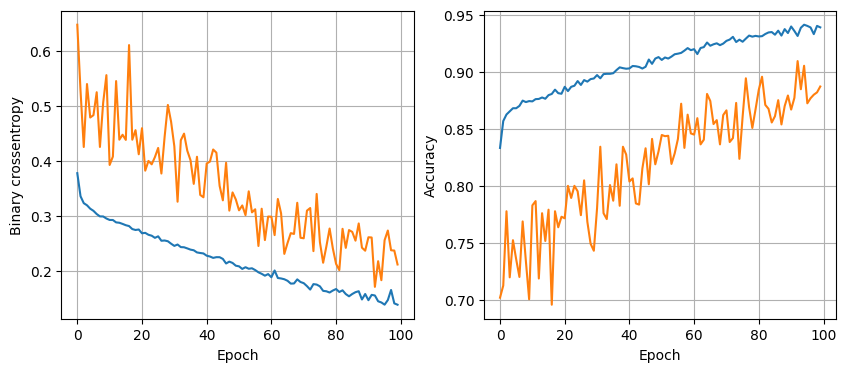

119/119 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.8609
64 nodes, dropout 0, lr 0.001, batch_size 32


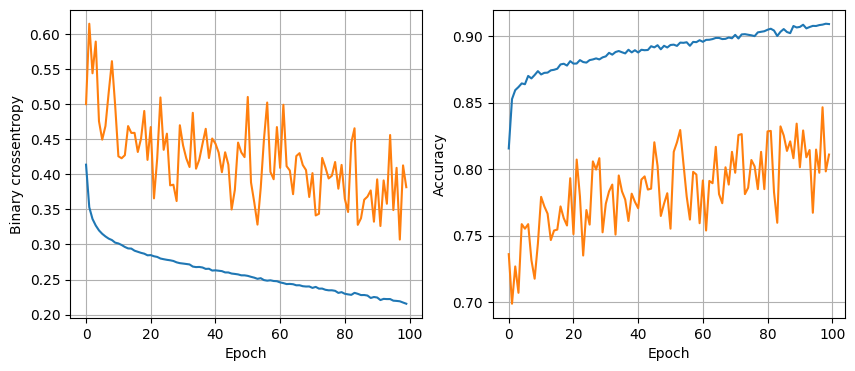

119/119 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.8757
64 nodes, dropout 0, lr 0.001, batch_size 64


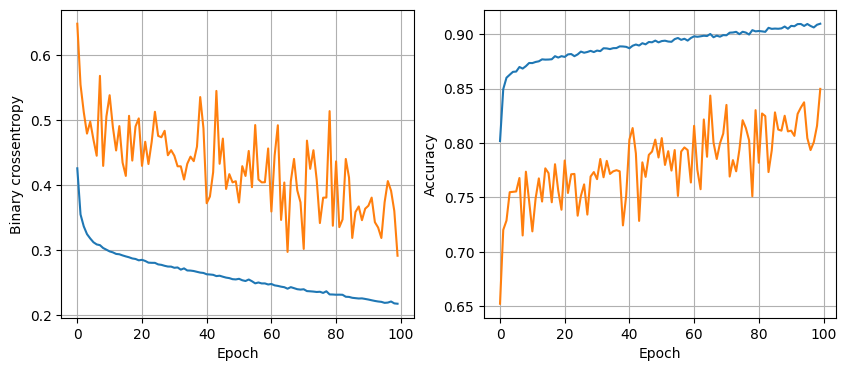

119/119 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.8699
64 nodes, dropout 0, lr 0.001, batch_size 128


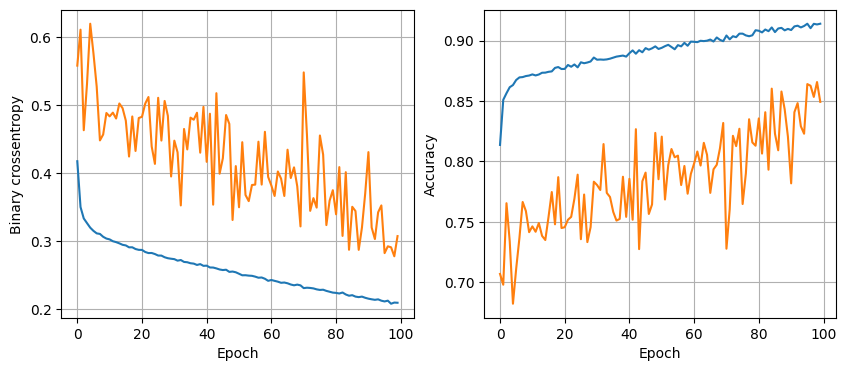

119/119 [==============================] - 0s 2ms/step - loss: 0.3506 - accuracy: 0.8717
64 nodes, dropout 0.2, lr 0.005, batch_size 32


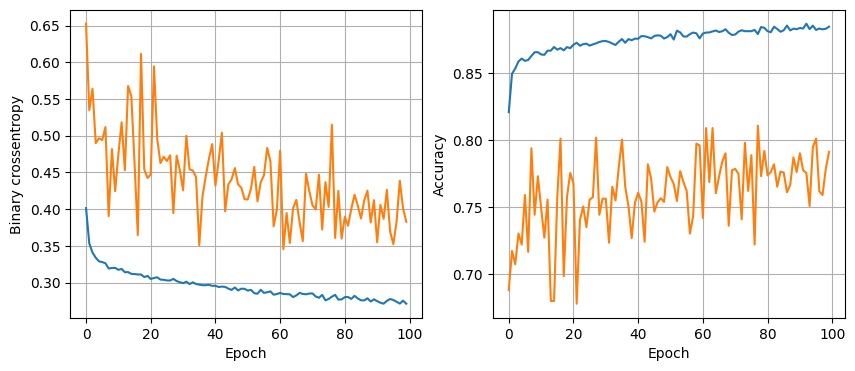

119/119 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8754
64 nodes, dropout 0.2, lr 0.005, batch_size 64


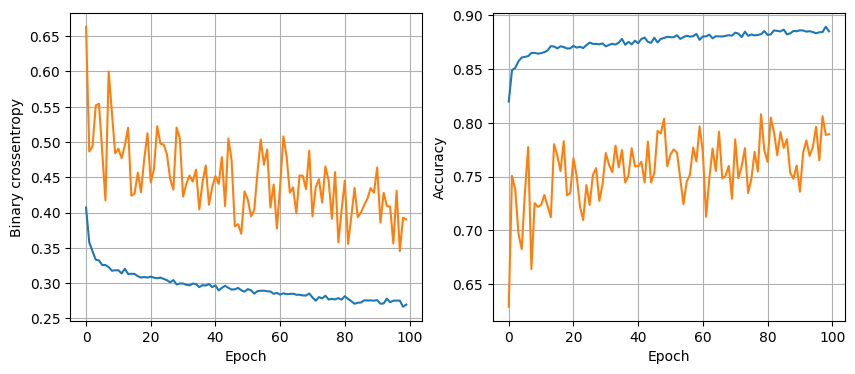

119/119 [==============================] - 0s 3ms/step - loss: 0.3120 - accuracy: 0.8754
64 nodes, dropout 0.2, lr 0.005, batch_size 128


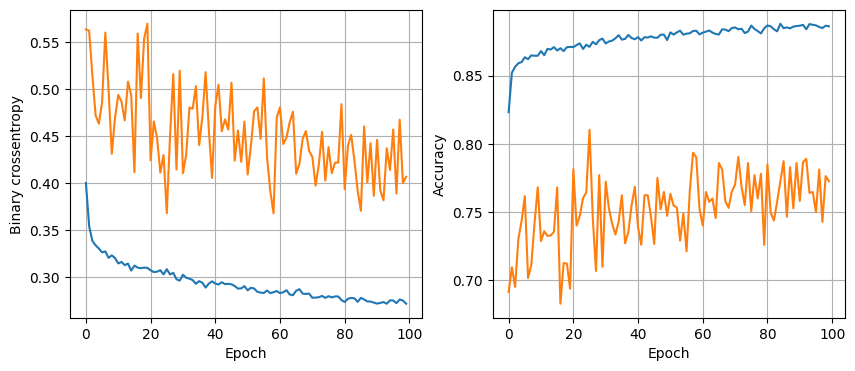

119/119 [==============================] - 0s 3ms/step - loss: 0.3098 - accuracy: 0.8775
64 nodes, dropout 0.2, lr 0.001, batch_size 32


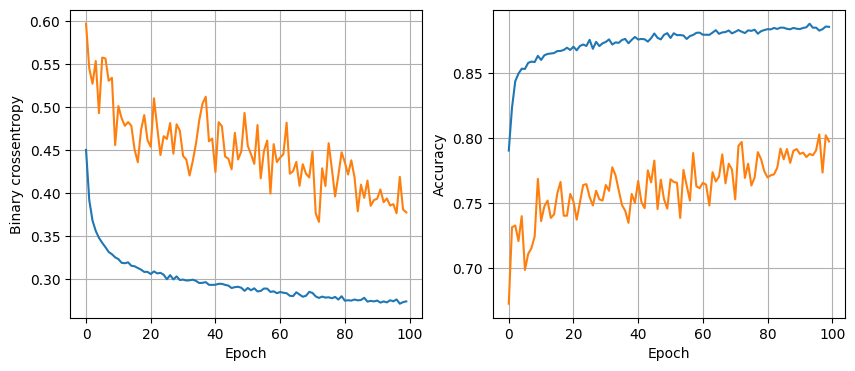

119/119 [==============================] - 0s 3ms/step - loss: 0.3064 - accuracy: 0.8772
64 nodes, dropout 0.2, lr 0.001, batch_size 64


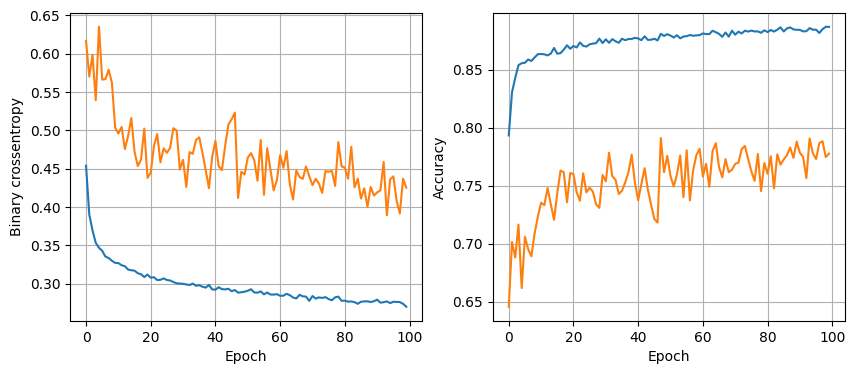

119/119 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.8828
64 nodes, dropout 0.2, lr 0.001, batch_size 128


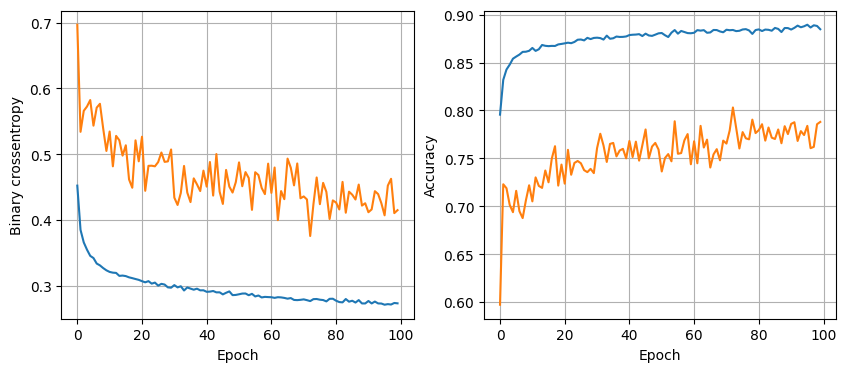

119/119 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.8835


In [ ]:
least_val_loss = float("inf")
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 1s 3ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1278
           1       0.89      0.89      0.89      2526

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804

